In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
df = pd.read_csv("/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

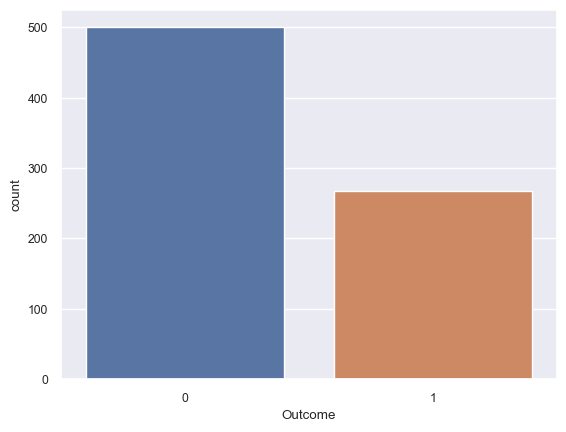

In [240]:
sns.countplot(data = df, x='Outcome')

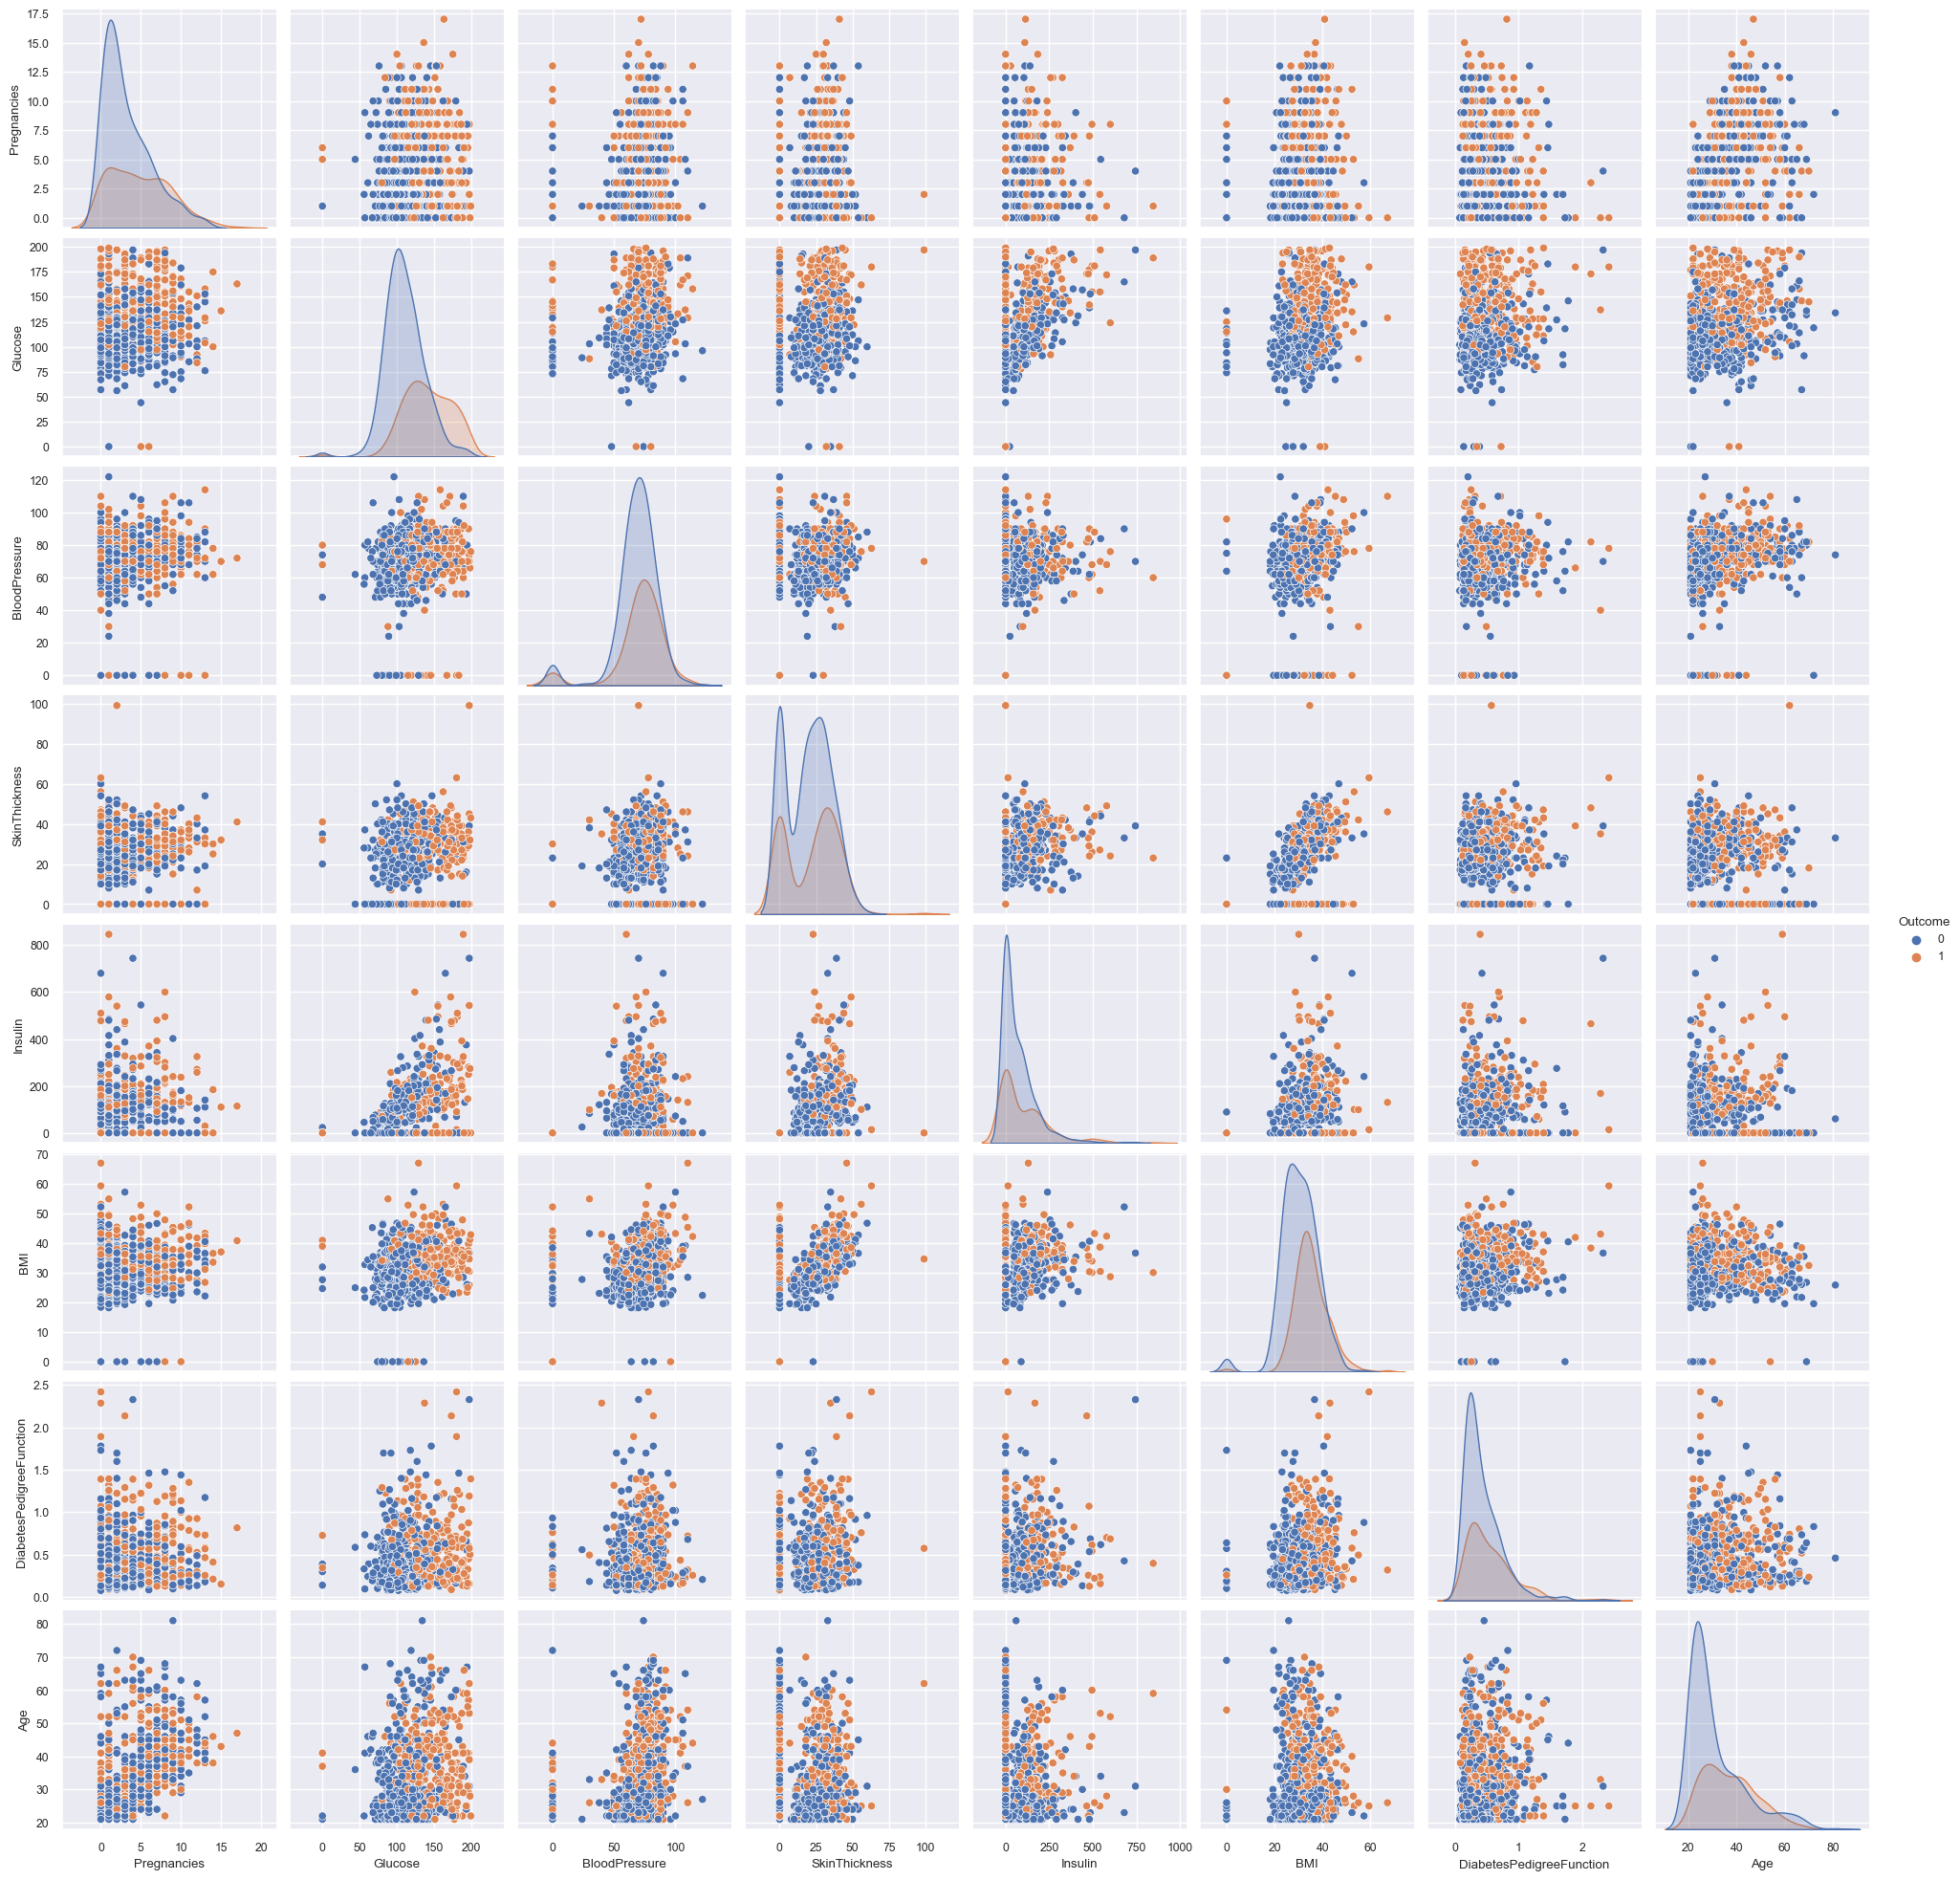

In [241]:
sns.pairplot(data = df, hue='Outcome')

In [242]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [243]:
df_corr = df.corr()

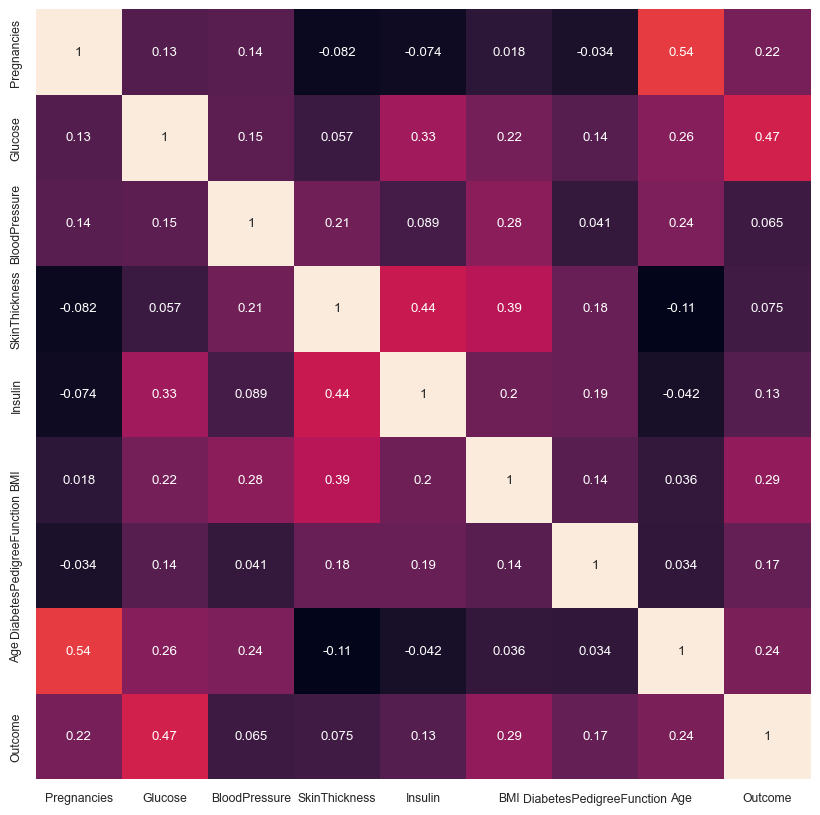

In [244]:
plt.figure(figsize = (10, 10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = False)
plt.show()

In [245]:
df = df.drop(['SkinThickness','DiabetesPedigreeFunction', 'Insulin'], axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,6,148,72,33.6,50,1
1,1,85,66,26.6,31,0
2,8,183,64,23.3,32,1
3,1,89,66,28.1,21,0
4,0,137,40,43.1,33,1


In [246]:
x = df.drop('Outcome', axis=1)
y= df['Outcome']

In [247]:
x.head()

,Pregnancies,Glucose,BloodPressure,BMI,Age
0,6,148,72,33.6,50
1,1,85,66,26.6,31
2,8,183,64,23.3,32
3,1,89,66,28.1,21
4,0,137,40,43.1,33


In [248]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [249]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle=True, random_state=12)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(614, 5) (614,)
(154, 5) (154,)


In [250]:
x.head()

,Pregnancies,Glucose,BloodPressure,BMI,Age
0,6,148,72,33.6,50
1,1,85,66,26.6,31
2,8,183,64,23.3,32
3,1,89,66,28.1,21
4,0,137,40,43.1,33


In [251]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [252]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle=True, random_state=12)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(614, 5) (614,)
(154, 5) (154,)


In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [254]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8051948051948052
[[92  7]
 [23 32]]


In [255]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8051948051948052
[[90  9]
 [21 34]]


In [256]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(x_train, y_train)

pred_nn = clf_nn.predict(x_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.7467532467532467
[[91  8]
 [31 24]]


In [257]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.6948051948051948
[[72 27]
 [20 35]]


In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7597402597402597
[[82 17]
 [20 35]]


In [259]:
from sklearn.model_selection import train_test_split
x = df[['BMI']]
y = df[['Glucose']]

In [260]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle=True, random_state=12)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(614, 1) (614, 1)
(154, 1) (154, 1)


In [261]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [262]:
lr.fit(x_train, y_train)

LinearRegression()

In [263]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- SVM Classifier ---
0.012987012987012988
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
mse: 125.96616222610747
mae: 121.4090909090909


In [264]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- Logistic Regression Classifier ---
0.006493506493506494
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
mse: 125.96616222610747
mae: 121.4090909090909


In [265]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(x_train, y_train)

pred_nn = clf_nn.predict(x_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- Neural Network Classifier ---
0.01948051948051948
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
mse: 125.96616222610747
mae: 121.4090909090909


In [266]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- Decision Tree Classifier ---
0.025974025974025976
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
mse: 125.96616222610747
mae: 121.4090909090909


In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- Radom Forest ---
0.025974025974025976
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
mse: 48.38012364221864
mae: 38.285714285714285


In [269]:
y_preds = lr.predict(x_test)
print(x_train.shape, x_test.shape)

(614, 1) (154, 1)


In [270]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 33.027503910351975


In [271]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 41.23376392843801


In [276]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(y_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 33.027503910351975


In [277]:
from sklearn import svm

model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(y_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 33.027503910351975
